# Altair Intro

![altair logo](../images/altair-logo-light.png)

Altair is a recent newcomer and an addition to the new wave of embracing Javascript plotting libraries in Python. Reality is that many graphs these days are either in Notebooks or intended for use in web apps such as Dashboards or webapp frontends for your code. Altair builds on [Vega-lite](https://vega.github.io/vega-lite/) _(which builds on [Vega](https://vega.github.io/vega/) which builds on [D3](https://d3js.org/))_

![turtles all the way down](../images/turtles.jpg)

Altair is great because it embraces the Grammar of Graphics:

![Grammar of graphics](../images/grammar.png)

The grammar of graphics is part of what makes ggplot2 in R so popular - it's a way of thinking of graphics as encoding data in various forms!

Let's start with a basic example:

*Note: Vega-datasets is just a collection of toy data*

In [1]:
import altair as alt
from vega_datasets import data

We grab the Iris dataset, which is loaded as a dataframe for us. Altair is designed to work nicely with DataFrames, so that's perfect for us!

In [2]:
iris = data.iris()

iris.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Now the magic bit - we declare that we want a chart based on our DataFrame `iris`, specify how we want to encode the data and what graphical element we want to use - let's start with a circle

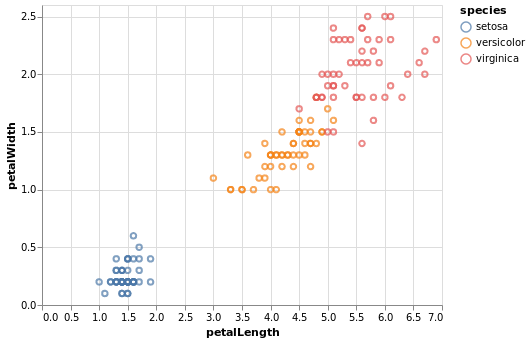

In [3]:
alt.Chart(iris).encode(
    x='petalLength',
    y='petalWidth',
    color='species'
).mark_point()

When we plot in other libraries such as matplotlib, we think of encoding x and y usually.  

Here specify that we want to encode color as species and Altair figures out how to make that work

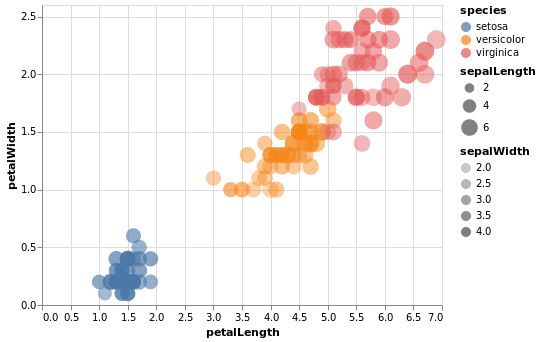

In [4]:
alt.Chart(iris).encode(
    x='petalLength',
    y='petalWidth',
    color='species',
    size='sepalLength',
    opacity='sepalWidth'
).mark_circle()

We've managed to encode all 5 dimensions of our data into our plot _(Not that this was a good idea, but we can!)_ and we did it by simply declaring that we wanted to do it. 

Imagine the same plot in matplotlib - the power of declarative syntax!

This is, however, a D3 visualization being rendered in our browser - that means interactions!

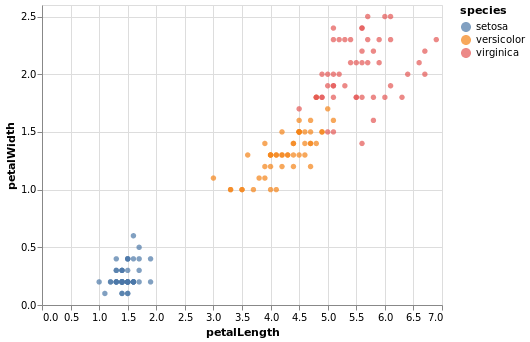

In [5]:
alt.Chart(iris).encode(
    x='petalLength',
    y='petalWidth',
    color='species',
    tooltip=['sepalLength', 'sepalWidth']
).mark_circle().interactive()

Pretty cool, no? We can add selections to our interactive graphs!

Altair also let's us easily concatenate multiple charts in both directions by overloading the binary operators `|` and `&`

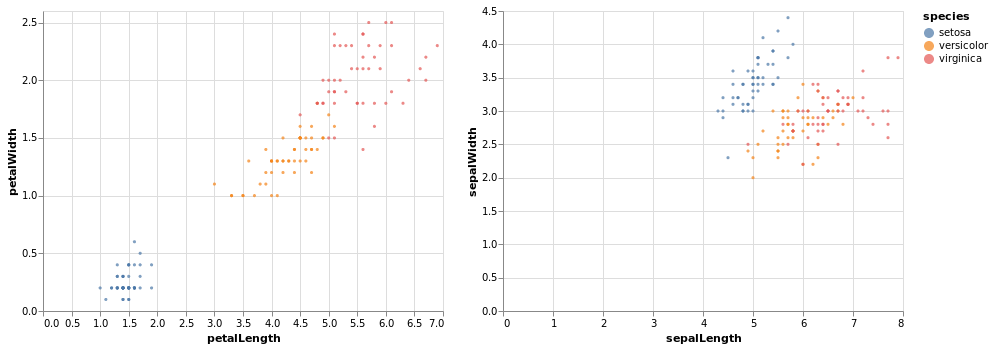

In [6]:
brush = alt.selection_interval(empty='none')

chart = alt.Chart(iris).encode(
    color='species',
    size=alt.condition(brush, alt.value(80), alt.value(10))
).add_selection(
    brush
).mark_circle()

chart.encode(x='petalLength', y='petalWidth') | chart.encode(x='sepalLength', y='sepalWidth')